source : https://www.statology.org/plot-roc-curve-python/

# ROC - AUC 

ROC-AUC relationship is a metric used to **evaluate the performance of classification models**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)
data

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


## Training and fitting the data

In [3]:
# Define the dependant and Independant variables
X = data[['student','balance','income']]
y = data['default']

In [4]:
# Split the dataset into Training and testing set
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [5]:
# instantiate the model
log_reg = LogisticRegression()

In [6]:
#fit the model using the training data
log_reg.fit(X_train,y_train)

LogisticRegression()

## Plotting the ROC curve

calculate the **True positive rate (Sensitivity)** and the **False Positive Rate (Specificity**

In [7]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

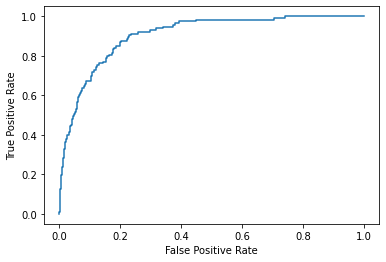

In [8]:
# Create the ROC Curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

## Calculating the AUC 

**AUC** let us quantify the evaluation of the model. The closer AUC is to 1 the better the model is.

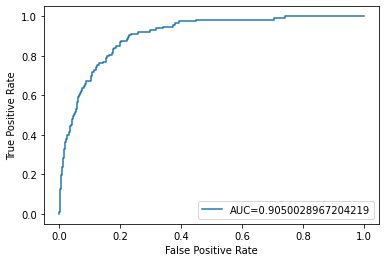

In [9]:
# Create the ROC Curve with AUC computation
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC being 0.905, the model does a pretty good job at classifying data